<a href="https://colab.research.google.com/github/elooo3/Masters-NLP---B620035/blob/main/NB_ISEAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing dependencies

In [ ]:
# importing needed libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# importing dataset
dataset = pd.read_excel('Dataset.xlsx', sheet_name = 'isear')

In [ ]:
from nltk.corpus import stopwords

stop_words = stopwords.words('english')

## **Text Preprocessing**

In [ ]:
# importing libraries for text preprocessing
import re # for simplifying the reviews
import nltk # for downloading ensemble of stop words
nltk.download('wordnet')
nltk.download('stopwords') # now, download stop words
from nltk.corpus import stopwords # import stop words into notebook
from nltk.stem.porter import PorterStemmer # import class to be used in performing stemming 
from nltk.stem import WordNetLemmatizer # import class to be used in performing lematization


corpus = [] # create a list which will contain all cleaned review data

# use a for loop to iterate through all the reviews and perform cleaning processes for each review
# following this add the clean reviews to 'corpus' 
for i in range(0, 7511): # where 7511 is the number of reviews in the dataset 

#  store data in review and update after every cleaning process
  review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i]) # re subfunction to replace any element that is not a letter with a space
  review = review.lower() # transform all capitals to lowercase letters 
  review = review.split() # split the different elements of the reviews into different words preparing it for stemming
  ps = PorterStemmer() # call stemming function
  lemma = WordNetLemmatizer() #call lemmatizer function
  all_stopwords = stopwords.words('english') # defining stop words in english
  
   # defining a list of words to be removed from stop word list
  unwanted_num = {'not','is','but','why','before','again','how','more','most','no','don','will','wouldn','against','aren','couldn','didn','doesn','hadn','hasn','haven','isn','wasn','weren'}
 
  all_stopwords = [ele for ele in all_stopwords if ele not in unwanted_num] # remove all words specified above from stop word list

  review = [lemma.lemmatize(word) for word in review if not word in set(all_stopwords)] # lemmatize words in the sentences for each review
  review = ' '.join(review) # get back original format of the review 
  corpus.append(review) # update corpus with each clean review

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\obemb\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\obemb\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## **Feature Engineering/Extraction**

In [ ]:

from sklearn.feature_extraction.text import TfidfVectorizer #import tfidf vectorizer for tokenization

# create instance of the tfidf vectorizer class
tfid = TfidfVectorizer(smooth_idf=False)

X = tfid.fit_transform(corpus).toarray() # fit corpus to X 
y = dataset.loc[:, ['Label']].values # sset target variable as the emotion states

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0) #split dataset into training and test sets in ratio 75:25

# Model fitting and Tuning

**Multinomial Naive Bayes**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier2 = MultinomialNB()
classifier2.fit(X_train, y_train)

C:\Users\obemb\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


MultinomialNB()

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score

#fit model on dataset using NB
y_hat = classifier2.predict(X_train)

accuracy_score(y_train, y_hat)

0.8267353097816439

In [ ]:
from sklearn.metrics import classification_report
y_pred = classifier2.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.57      0.76      0.65       250
           2       0.70      0.72      0.71       280
           3       0.45      0.39      0.42       272
           4       0.62      0.59      0.60       287
           5       0.66      0.52      0.58       280
           6       0.44      0.40      0.42       256
           7       0.44      0.53      0.48       253

    accuracy                           0.56      1878
   macro avg       0.56      0.56      0.55      1878
weighted avg       0.56      0.56      0.55      1878



In [ ]:
# Area Under Curve
#roc auc score
#predicting unseen data
y_prob_pred = classifier2.predict_proba(X_test)
roc_auc_score(y_test, y_prob_pred, multi_class='ovr', average='weighted')

0.8538630838584796

In [ ]:
#k-fold cross validation
from sklearn.model_selection import KFold 
kfold = KFold(n_splits=7)
kfold.get_n_splits(X)

7

In [ ]:
# performing cross validation
from statistics import mean
cnt =0
count=[]
train_score =[]
test_score = []

for train_index,test_index in kfold.split(X):
    X_train, X_test = X[train_index], X[test_index] # our scaled data is an array so it can work on x[value]
    #y_train, y_test = y.iloc[train_index], y.iloc[test_index] # y is a dataframe so we have to use "iloc" to retreive data
    y_train, y_test = y[train_index], y[test_index]
    classifier2.fit(X_train,y_train)
    train_score_ = classifier2.score(X_train,y_train)
    test_score_ =  classifier2.score(X_test,y_test)
    cnt+=1
    count.append(cnt)
    train_score.append(train_score_)
    test_score.append(test_score_)
    
    print("for k = ", cnt)
    print("train_score is :  ", train_score_, "and test score is :  ", test_score_)
print("************************************************")
print("************************************************")
print("Average train score is :  ", mean(train_score))
print("Average test score is :  ", mean(test_score))

C:\Users\obemb\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


for k =  1
train_score is :   0.811587449518484 and test score is :   0.5284249767008388


C:\Users\obemb\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


for k =  2
train_score is :   0.8039763901832867 and test score is :   0.5750232991612302


C:\Users\obemb\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


for k =  3
train_score is :   0.8027337682510096 and test score is :   0.5824790307548928


C:\Users\obemb\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


for k =  4
train_score is :   0.8122087604846225 and test score is :   0.5219012115563839


C:\Users\obemb\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


for k =  5
train_score is :   0.8216837527182355 and test score is :   0.5330848089468779


C:\Users\obemb\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


for k =  6
train_score is :   0.8053743398570985 and test score is :   0.5806150978564771
for k =  7
train_score is :   0.8168685927306617 and test score is :   0.53215284249767
************************************************
************************************************
Average train score is :   0.810633293391914
Average test score is :   0.5505258953534815


C:\Users\obemb\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


***Complement NB***

In [ ]:
from sklearn.naive_bayes import ComplementNB
classifier3 = ComplementNB()
classifier3.fit(X_train, y_train)
y_hat = classifier3.predict(X_train)
accuracy_score(y_train, y_hat)

C:\Users\obemb\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.8465361913637776

In [ ]:
y_pred = classifier3.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.50      0.70      0.58       153
           2       0.72      0.76      0.74       153
           3       0.44      0.42      0.43       151
           4       0.65      0.44      0.52       153
           5       0.60      0.42      0.49       155
           6       0.47      0.51      0.49       154
           7       0.49      0.55      0.52       154

    accuracy                           0.54      1073
   macro avg       0.55      0.54      0.54      1073
weighted avg       0.55      0.54      0.54      1073



In [ ]:
from statistics import mean
cnt =0
count=[]
train_score =[]
test_score = []

for train_index,test_index in kfold.split(X):
    X_train, X_test = X[train_index], X[test_index] # our scaled data is an array so it can work on x[value]
    #y_train, y_test = y.iloc[train_index], y.iloc[test_index] # y is a dataframe so we have to use "iloc" to retreive data
    y_train, y_test = y[train_index], y[test_index]
    classifier3.fit(X_train,y_train)
    train_score_ = classifier3.score(X_train,y_train)
    test_score_ =  classifier3.score(X_test,y_test)
    cnt+=1
    count.append(cnt)
    train_score.append(train_score_)
    test_score.append(test_score_)
    
    print("for k = ", cnt)
    print("train_score is :  ", train_score_, "and test score is :  ", test_score_)
print("************************************************")
print("************************************************")
print("Average train score is :  ", mean(train_score))
print("Average test score is :  ", mean(test_score))

C:\Users\obemb\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


for k =  1
train_score is :   0.8365952159055607 and test score is :   0.5349487418452936


C:\Users\obemb\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


for k =  2
train_score is :   0.8342652997825412 and test score is :   0.5852749301025163


C:\Users\obemb\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


for k =  3
train_score is :   0.8292948120534327 and test score is :   0.5973904939422181


C:\Users\obemb\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


for k =  4
train_score is :   0.8404784094439267 and test score is :   0.5293569431500466


C:\Users\obemb\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


for k =  5
train_score is :   0.8435849642746195 and test score is :   0.5302889095992545


C:\Users\obemb\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


for k =  6
train_score is :   0.8341099720410066 and test score is :   0.5983224603914259


C:\Users\obemb\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


for k =  7
train_score is :   0.8465361913637776 and test score is :   0.5424044734389561
************************************************
************************************************
Average train score is :   0.8378378378378378
Average test score is :   0.5597124217813872


([<matplotlib.axis.YTick at 0x25625d80e20>,
 <a list of 7 Text major ticklabel objects>)

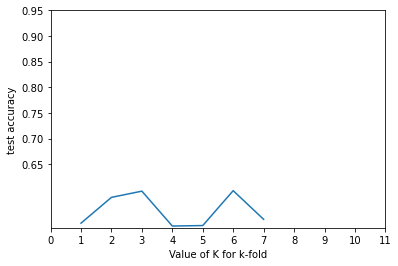

In [ ]:
# let's plot the test_accuracy with the value of k in k-fold

plt.plot(count,test_score)
plt.xlabel('Value of K for k-fold')
plt.ylabel('test accuracy')
plt.xticks(np.arange(0, 12, 1)) 
plt.yticks(np.arange(0.65, 1, 0.05))